## PyTorch Workflow

Let's explore an example PyTorch end-to-end workflow

In [279]:
what_were_covering = {  1:"data prepare and load",
                        2:"build model",
                        3:"fitting the model to data (training)",
                        4:"making predictions and evaluating a model (inference)",
                        5:"saving and loading the model",
                        6:"putting it all together"}
what_were_covering

{1: 'data prepare and load',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluating a model (inference)',
 5: 'saving and loading the model',
 6: 'putting it all together'}

In [280]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# Check PyTorch vesion
torch.__version__

'2.6.0+cu126'

## 1. Data preparation and loading

Data can be almost anything in machine learning
* Excel spreadsheet
* Images of any kind
* Videos 
* Audio
* DNA
* Text

Machine learning is a game of 2 parts:
1. Get data into a numerical representation
2. Build a model to learn patterns in that numerical representation

To showcase this, let's create some *known* data using the linear regression formula.

We'll use a linear regression formula to make a straight line with *known* **parameters**

In [281]:
# Create *known* parameters
weight = 0.9
bias = 0.3

# Create some data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

print(X[:10], y[:10], len(X), len(y))

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800]]) tensor([[0.3000],
        [0.3180],
        [0.3360],
        [0.3540],
        [0.3720],
        [0.3900],
        [0.4080],
        [0.4260],
        [0.4440],
        [0.4620]]) 50 50


### Splitting data into training and test sets

Let's create a training and test set with our data

In [282]:
# Create a train/test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

How might we visualize our data?

"Visualize, visualize, visualize"

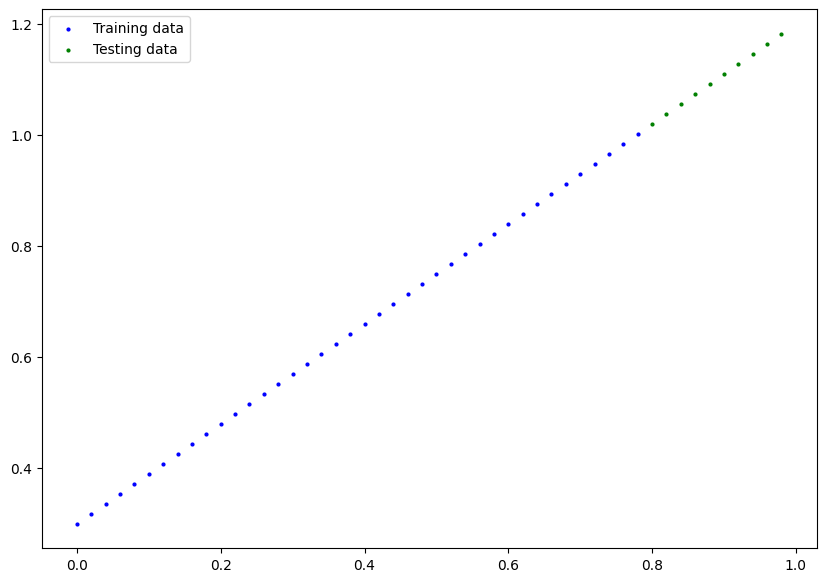

In [283]:
def plot_prediction(train_data, train_labels, test_data,test_labels, predictions = None):
    """
    Plots training data, test data and compares predictions
    """
    plt.figure(figsize=(10,7))
    
    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

    # PLot test data in green
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

    # Are there predicitons?
    if predictions is not None:
        # Plot predictions if they exists
        plt.scatter(test_data, predictions, c= "r", s = 4, label="Predicitions")

    # Show the legends
    plt.legend()


plot_prediction(X_train, y_train, X_test, y_test)


## 2. Build model

First PyTorch model

Python classes (OOP): https://realpython.com/python3-object-oriented-programming/


What our model does:
* Start with random values (weight & bias)
* Look at training data and adjust the random values to better represent (or get closer to) the ideal values 

How does it do so?

Through 2 main algorithms:
1. Gradient descent
2. Backpropagation

In [284]:
# Create a linear regression model class
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch inherits from nn.Module
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float)) # requires_grad = True by default
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

    # Forward method to define the computation in the model (every class that inherits nn.Module must ovverride that)
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data
        return self.weights * x + self.bias # Linear regression formula


### PyTorch model building essentials

* torch.nn - contains all of the buildings for computational graphs (nn can be considered a computational graph)
* torch.nn.Parametere - what parameteres should our model try and learn, often a PyTorch layer from torch.nn will set these for us
* torch.nn.Moduel - The base class for all nerual network moduels, if you inherit it, you should override forward
* torch.optim - this is where the optimizers in PyTorch live, they will help with gradient descent
* def forward() - All nn.Module subclasses require you to overwrite forward(), this method defines what happens in the forward computation

ref: pytorch docs cheatsheet

### Checking the contents of our PyTorch model

Now we've created the model let's see what is inside...

So we can check our model parameters or what's inside our model using `.parameters()`

In [285]:
# Create a random seed
RANDOM_SEED = 42
torch.manual_seed(RANDOM_SEED)

# CReate and instance of the model (this is a sublclass of nn.Module)
model_0 = LinearRegressionModel() 

# Check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [286]:
# List name parameters
print(model_0.state_dict())

weight, bias

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])


(0.9, 0.3)

### Making predictions using `torch.inference_mode()`

To check our model's predictive power, let's seee how well it predicts `y_test` on `X_test`

When we pass data through out model, it's going to run it throuhg the `forward()`

In [287]:
# This is slower
y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], grad_fn=<AddBackward0>)

In [288]:
# use this for inference
with torch.inference_mode():
    y_preds = model_0(X_test)

#similar, but worse, inference mode is better
with torch.no_grad():
    y_preds = model_0(X_test)

y_preds 

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

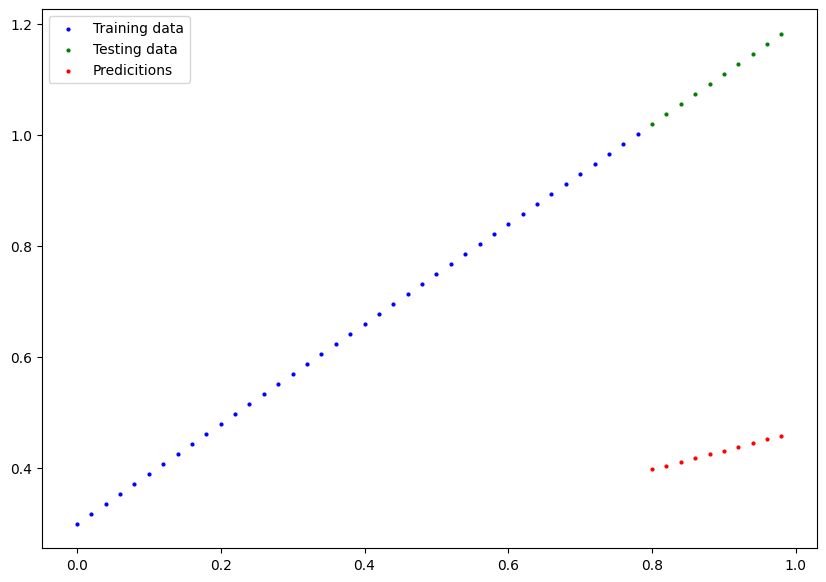

In [289]:
#Basically random predictions
plot_prediction(X_train, y_train, X_test, y_test, y_preds)

## 3. Train model

The whole idea of training is for a model to move from some unknown parameters (these may be random) to some known parameters

From a poor represenation of the data to a better representation

One way to measure how wrong your model's predictions are is to use a loss/cost function (criterion).

Things we need to train:

* **Loss function:** A function to measure how wrong your model's predictoins are to the ideal outputs.
* **Optimizer:** Takes into account the loss of a model and adjusts the models parameters (e.g. weight and bias values) to improve the loss function. 

And specificall for PyTorch we need:
* A training loop
* A testing loop


In [290]:
# Check out the models parameters (a parameter is a value theat the model sets itself)
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

#### Which optimizer
* regression : ex. SGD
* classification :  ex. BCEloss

In [298]:
# Setup a loss function 
loss_fn = nn.L1Loss()

# Setup an optimizer, you have to often set the params and the learning rate
optimizer = torch.optim.SGD(model_0.parameters(),
                            lr = 0.01) #lr = learning rate (important hyperparameter, you can set), larger learning rate, larger change in the parameter


### Building a training (and testing) loop in PyTorch

A couple of things we need in a training loop:

0. Loop through the data 
1. Forward pass/propagation to make predictions on data(this involves data moving through model's `forward()` functions) 
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimize zero grad
4. Loss backward - move backwards through the network to calculate the gradients of each of the parameters of our model with respect to the loss (**backpropagation**)
5. Optimizer step - use the optimizer to adjust out model's parameters to try and improve the loss (**gradient descent**)

learning rate scheduling - make smaller steps as you are closer to the minimum

In [301]:
torch.manual_seed(42)

# An epoch is one loop through the data... (this is a hyperparameter because we have set it ourselves)
epochs = 1000

### Traning
# 0. Looop through the data
for epoch in range(epochs):
    # Set the model to training mode
    model_0.train() # train mode sets all paramters that require gradients to have gradients

    # 1. Forward pass
    y_pred = model_0(X_train) 

    # 2. Calculate the loss
    loss = loss_fn(y_pred, y_train)
    #print(f"loss = {loss}")

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Perform backpropagation on the loss with respect to the parameters of the model
    loss.backward()

    # 5. Step the optimizer (perform gradient descent)
    optimizer.step() # by default how the optimizer changes will accumulate through the loop... we have to zero them above in step 3 for the next iteration
    
    
    

    ### Testing 
    model_0.eval() # turns off  stuff no needed for evaluation/testing (dropout layers, batch norm (normalizations layers))
    with torch.inference_mode(): # turns of gradient tracking and a couple more things - look at pytorch tweet, torch.no_grad() also in older code
        # 1. Do the forward pass 
        test_pred = model_0(X_test)

        # 2. Calculate the loss
        test_loss = loss_fn(y_test, test_pred)

    # print out what is happening
    if epoch %100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")
        print(model_0.state_dict())


Epoch: 0 | Loss: 0.056321561336517334 | Test loss: 0.1310899555683136
OrderedDict([('weights', tensor([0.6215])), ('bias', tensor([0.4168]))])
Epoch: 100 | Loss: 0.021976912394165993 | Test loss: 0.050425171852111816
OrderedDict([('weights', tensor([0.7924])), ('bias', tensor([0.3453]))])
Epoch: 200 | Loss: 0.005989248864352703 | Test loss: 0.008535897359251976
OrderedDict([('weights', tensor([0.8940])), ('bias', tensor([0.2968]))])
Epoch: 300 | Loss: 0.005989248864352703 | Test loss: 0.008535897359251976
OrderedDict([('weights', tensor([0.8940])), ('bias', tensor([0.2968]))])
Epoch: 400 | Loss: 0.005989248864352703 | Test loss: 0.008535897359251976
OrderedDict([('weights', tensor([0.8940])), ('bias', tensor([0.2968]))])
Epoch: 500 | Loss: 0.005989248864352703 | Test loss: 0.008535897359251976
OrderedDict([('weights', tensor([0.8940])), ('bias', tensor([0.2968]))])
Epoch: 600 | Loss: 0.005989248864352703 | Test loss: 0.008535897359251976
OrderedDict([('weights', tensor([0.8940])), ('bi

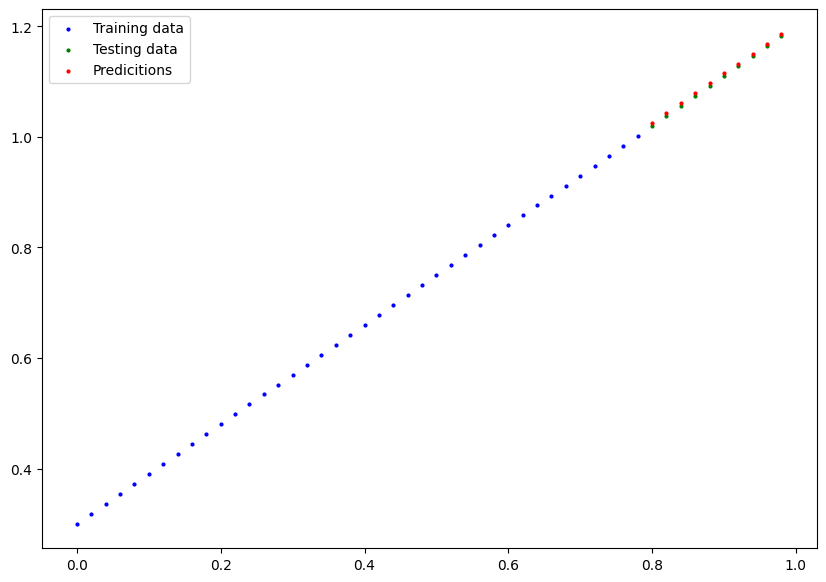

In [302]:
# Predictions 
with torch.inference_mode():
    y_preds_new = model_0(X_test)

plot_prediction(X_train, y_train, X_test, y_test, y_preds_new)